### Data format

We can **assume** that the result of the RNA-seq experiment is a simple table like this:

|        | Sample 1 | .... | Sample N |
|--------|----------|------|----------|
| Gene 1 | 35       |      | 897      |
| ....   |          |      |          |
| Gene N | 0        |      | 760      |

And the values ​​in each cell indicate the estimated normalized expression of the gene in this sample. This is not a direct number of RNA copies, but a normalized value strongly correlated with it.

For those interested, the normalization of RNA-seq experiments is a very complex topic. We will use TPM values ​​and trust that all basic assumptions remain valid.

### Questions
* [0.3] Why do we use RNA sequencing but don't measure proteins directly? Provide a brief **high-level** description of the major technical reasons.

Белок не является матрицей, т.к. это эффектор в клетке и не существует относительно простых методов анализа протеома. Белки обычно детектируются с помощью антител или хроматографии. Базовая реакция реализации и удвоения генетической информации - ПЦР. Исследователи используют ПЦР для количественного и качественного анализа НК, также с помощью ПЦР можно исследовать геном или полный транскриптом. Белок не является модульной реплицируемой молекулой поэтому такие методы к нему не применимы.
* [0.3] Why might RNA-seq be a poor indicator of protein abundance?

С одной РНК может быть наработано большое количество молекул беока. Чаще всего количество белка соотносится с РНК, но не всегда. РНК также быстро разрушается в клетке, т.е. РНК наработалас, с нее синтезировался белок, который продолжит работать еще какое-то время, а РНК может уже разрушиться. Также существуют некодирующие РНК, с которых не транслируется белок и они выполняют регуляторную функцию в клетке.

* [0.3] Give four examples where the transcribed RNA is directly involved in some biological process (i.e., it functions without translation, which violates the central dogma). Give a brief explanation for each example (1 sentence).

Малые некодирующие РНК:   
** мякРНК - являются структурно-каталитическими элементами субчастиц рибосомы, участвуют в сборке рибосомы в ядрышке  
** микроРНК - участвуют в процессе down-регуляции экспрессии определенных белков на уровне РНК, за счет присоединения к какому-либо участку матричной РНК и ингибирования трансляции или индукции разрушения мРНК
** другие микроРНК -  межклеточная коммуникация через экзосомы, могут передавать сигналы близкому или дальнему клеточному окружению, микроРНК также могут влиять на эпигенетические модификации геномной ДНК  
Длинные некодирующие РНК (в т.ч. рРНК, тРНК) - участвуют во многих регуляторных процессах в клетке (эпигенетическая регуляция, транскрипция, трансляция, могут быть скаффолдами для нескольких совместно функционирующих белков)

* [0.3] What kinds of analyzes can we perform using RNA sequencing data? Describe any two of them in detail.

Дифференциальная экспрессия генов - например необходимо оценить ответ на какое-то лекарство или определенные условия среды. Ответом может быть индукция экспрессии белков или их ингибирование. Колисественная оценка эспрессированной РНК поэфоляет искать отличия в экспрессии среди контрольных образцов и образцов, к которым было добавлено ллекарство или которые поместили в нестандартные условияю.

Детекция экспрессии изоформ белка - из-за альтернативного сплайсинга в клетке могут экспрессироваться различные (в т.ч. функционально) изоформы белка. Для детекции изоформ и количественного соотношения их экспрессии можно использовать РНК-сек


* [0.3] Imagine that you are studying a group of cells in two conditions. You need to compare their transcriptome between two states and you decide to run RNA sequencing in duplicate (2x2 = 4 samples). What will be the approximate cost of sequencing these samples using the Total RNA-seq protocol in the US? Provide links.

Total RNA (ribo and/or globin RNA depletion)	 = $2,737 (Cost for First Sample	) + 3*$120 (Cost per Additional sample) ~ **3097$**   
https://functionalgenomicscore.ucsf.edu/getting-started#:~:text=We%20typically%20aim%20for%2040,%2Dend%20100bp%2F150bp%20sequencing.



---



---


You are expected to search answers online and discuss with your more experienced colleagues. Just remember to understand and explain everything in your own words.


# Data preprocessing [1.5]

We are going to use pre-processed RNA-seq data from mouse brain cells with 2 genotypes - wild type (WT) and ADAR1-KO (aka knockout/inactive/disrupted ADAR1 gene).

**[1] points in this section is for writing code.**

In [ ]:
# gdown - shell tool to download files from google drive by ID
# ! => run shell command instead of python command
!gdown 1g05Wfjyxa1eMfpUiHpndFWWNuTikJBlc

Downloading...
From: https://drive.google.com/uc?id=1g05Wfjyxa1eMfpUiHpndFWWNuTikJBlc
To: /content/HW-1.TPM.tsv.gz
100% 1.15M/1.15M [00:00<00:00, 142MB/s]


In [ ]:
!gunzip /content/HW-1.TPM.tsv.gz

gzip: /content/HW-1.TPM.tsv already exists; do you wish to overwrite (y or n)? y


In [ ]:
import pandas as pd
import numpy as np

# Load tab separated HW-1.TPM.tsv.gz file, and create a data frame
# hint: read_csv with sep
df = pd.read_csv("/content/HW-1.TPM.tsv", sep = "\t")

# Show the first 5 rows
df.head(5)

,gene_id,gene_name,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
0,ENSMUSG00000000001,Gnai3,41.497520,36.699438,37.343788,38.061131,37.586224,32.082841
1,ENSMUSG00000000003,Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000000028,Cdc45,1.885241,2.411933,1.662913,2.533332,2.380505,2.200205
3,ENSMUSG00000000031,H19,4.660286,2.929563,11.034701,6.114367,37.147375,3.223032
4,ENSMUSG00000000037,Scml2,1.008518,1.175329,0.775612,1.114238,0.891466,0.933327


If this were a completely new project, you must first refine the meaning of each column. In our case:
* `gene_id` - gene id from the [Ensembl database](https://ensembl.org/index.html)
* `gene_name` - name of the gene
* `WT 1/2/3` - estimated expression of the gene in WT samples 1..3
* `ADAR1-KO` - estimated expression of the gene in ADAR1-KO samples

[0.25] What is the function of this protein, ADAR1? Check its [gene card](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ADAR) and provide a short summary (1-2 sentences)

Adenosine Deaminase RNA Specific. Этот ген кодирует фермент, отвечающий за редактирование РНК путем сайт-специфического деаминирования аденозинов.


Before continuing, we also need to check that the numeric columns have been parsed correctly and that we don't have any missing values.

In [ ]:
# Print dtypes and make sure that all expression columns are float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55414 entries, 0 to 55413
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gene_id     55414 non-null  object 
 1   gene_name   55414 non-null  object 
 2   WT 1        55414 non-null  float64
 3   WT 2        55414 non-null  float64
 4   WT 3        55414 non-null  float64
 5   ADAR1-KO 1  55414 non-null  float64
 6   ADAR1-KO 2  55414 non-null  float64
 7   ADAR1-KO 3  55414 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.4+ MB


In [ ]:
# Check that we don't have missing values
# hint: isna with sum
totalna = df.isna().sum()
print("Total NA cells: ", totalna)

# Assert that its actually 0 and provide some message if it's not
assert df.isna().sum().sum() == 0

Total NA cells:  gene_id       0
gene_name     0
WT 1          0
WT 2          0
WT 3          0
ADAR1-KO 1    0
ADAR1-KO 2    0
ADAR1-KO 3    0
dtype: int64


The values ​​of the normalized expression in this dataset cannot be less than 0. Let's check if it's true:

In [ ]:
# Select numerical columns
# hint: select_dtypes
dfnumcols = df.select_dtypes(include = 'number')
numcols = dfnumcols.columns.values.tolist()
# Assert that the total number of values < 0 is 0
assert (df[numcols] < 0).sum().sum() == 0
"All RNA abundance estimates must be > 0"

'All RNA abundance estimates must be > 0'

Now let's drop genes that are barely expressed:

In [ ]:
# Calculate non-zero quantiles for each expression column
qthr = 0.01
quantiles = []
for col in df[numcols]:
  series = df[[col]]
  # Select non zero values
  nozero = series.loc[(series != 0).any(axis = 1)]
  # Calculate quantiles
  q = nozero.quantile(qthr)

  quantiles.append(q)

# Print results
for col, q in zip(numcols, quantiles):
  print(col, '->', q.iloc[0])

  # assert that quantile is not zero
  assert q.iloc[0] != 0

WT 1 -> 0.01082312
WT 2 -> 0.01019045
WT 3 -> 0.01016553
ADAR1-KO 1 -> 0.01011308
ADAR1-KO 2 -> 0.00947186
ADAR1-KO 3 -> 0.011762540000000002


In [ ]:
quant_list = []
for q in quantiles:
  quant_list.append(q.iloc[0])
min(quant_list)

0.00947186

In [ ]:
# As a threshold we will use a min quantile
threshold = min(quant_list)

print("Genes before", df.shape[0])

# We will drop all columns,
# where the expression is below the threshold in all samples
mask = (df[numcols] >= threshold).any(axis=1)
df = df[mask].copy()

print("Genes after", df.shape[0])

Genes before 55414
Genes after 32541


Let's check the genes with the total maximum expression in all samples:

In [ ]:
overallexpr = df[numcols].sum(axis=1)

# New trick:
## sort by index
argsort = overallexpr.argsort()
## select top 25 elements
index = argsort[-15:]

# Print selected genes
# hint: use iloc for indexing using row ids
df.iloc[index]

,gene_id,gene_name,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
18695,ENSMUSG00000065947,mt-Nd4l,3244.481524,3787.011878,5191.404945,4300.233598,4692.699653,3824.266417
49540,ENSMUSG00000115420,Rmrp,4648.810066,5935.635789,5110.159742,4217.981449,3487.013390,3726.549261
17925,ENSMUSG00000064363,mt-Nd4,4578.895973,4504.075658,5439.584430,5016.570289,5410.107547,5138.580676
17919,ENSMUSG00000064356,mt-Atp8,3451.798433,3194.473193,6608.528970,4569.459389,6933.611236,5597.696083
17923,ENSMUSG00000064360,mt-Nd3,4762.398471,4759.783429,6556.043245,6048.342017,6107.484679,5500.308998
17932,ENSMUSG00000064370,mt-Cytb,7140.148099,7157.130352,7060.157734,7265.976052,7694.228833,7855.445480
17904,ENSMUSG00000064341,mt-Nd1,7689.936568,7120.516366,7850.802297,8494.714554,9201.511742,8645.226517
35986,ENSMUSG00000100862,Gm10925,8668.572102,7631.164943,8472.854381,9178.058135,10870.244060,9758.700512
36227,ENSMUSG00000101111,Gm28437,9590.183503,9092.210924,10351.376384,9470.910668,11953.672795,10212.991929
30928,ENSMUSG00000092837,Rpph1,11583.957861,12935.043219,12466.619806,13130.398621,10852.620645,10056.491107


Obviously, these genes are not outliers due to their **consistently** high expression.

[0.25] What gene groups do we have here (hint - at least 2)? Give a brief description for each category.

Гены, которые начинаются с mt- являются митохондриальными, т.к. митохондрий много рнк этих генов тоже много.  
Гены, которые начинаются с R являются нетранслируемыми РНК, которые в комплексе с белками обеспечивают важные сигнальные и регуляторные пути в клетке.  
Также есть группа генов, которые начинаются с Gm, судя по гуглу они являются псевдогенами (или длинными некодирующими РНК), участвующими в регуляции экспрессии других генов

# Quality control [5]

The data is ready, and, fortunately, without obvious problems. In this homework we will focus on basic quality control (QC) figures.

Several decades ago such plots would have been included in almost all relevant publications. Now the quality of RNA sequencing has improved significantly, and the researchers simply mention that the samples passed the standard quality check.

## PCA [1.5]

It is a well-known observation that PCA decomposition of expression profiles should group samples according to their origin. In our case, we expect to observe two clusters - KO and WT cells.

The closer the samples are to each other on the PCA plot, the better. However, we are fine as long as the samples can be separated by a straight line.


**[0.5] points in this section is for writing code.**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select expression columns
data = df[numcols].to_numpy()
# Transpose the matrix to treat genes as features
data = data.transpose()
# Transform to zero mean and unit variance
data = StandardScaler().fit_transform(data)

# first thing is to calculate the PCA decomposition
# hint: don't forget the random state & request 2 components to make a 2D plot
pca = PCA(random_state=32, n_components=2)
pca = pca.fit_transform(data)

samples, coords = pca.shape
print(f"Samples: {samples}")
print(f"Components: {coords}")

Samples: 6
Components: 2


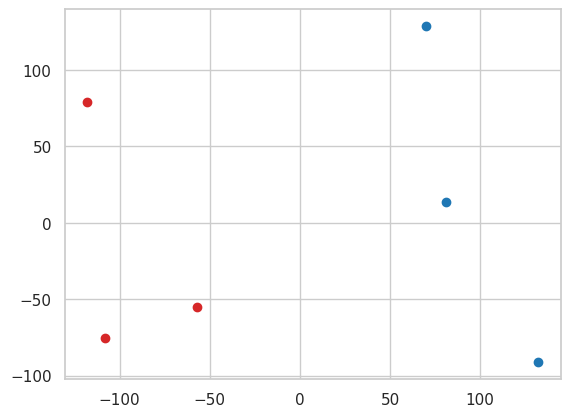

In [ ]:
import matplotlib.pyplot as plt
# colors in HEX format
palette = {"WT": "#1F77B4", "ADAR1-KO": "#D62728"}

# Create a basic draft
fig = plt.figure()
ax = fig.gca()

for (x, y), col in zip(pca, numcols):
  group = "WT" if "WT" in col else "ADAR1-KO"
  color = palette[group]
  ax.scatter(x, y, color=color)

fig.show()

[1.0] Your task is to start with the plot above and reproduce the below version:

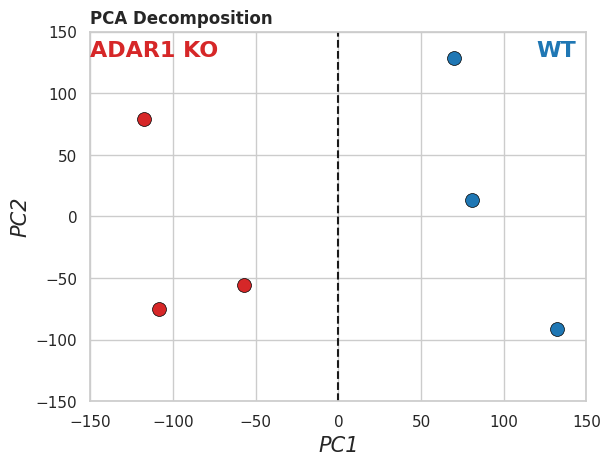

In [ ]:
# colors in HEX format
palette = {"WT": "#1F77B4", "ADAR1-KO": "#D62728"}

# Create a basic draft
fig = plt.figure()
ax = fig.gca()

for (x, y), col in zip(pca, numcols):
  group = "WT" if "WT" in col else "ADAR1-KO"
  color = palette[group]
  ax.scatter(x, y, color=color, edgecolor='black', linewidth = 0.5, s = 100)

ax.set_xlabel("PC1", fontdict={'style': 'italic'}, size = 15)
ax.set_ylabel("PC2", fontdict={'style': 'italic'}, size = 15)
plt.title("PCA Decomposition", loc='left', fontdict={'weight': 'bold'})
ax.grid(True)
ax.axvline(x=0, color='k', linestyle='--')
ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)
ax.text(-150, 130, "ADAR1 KO", color='#D62728', fontweight='bold', size = 16)
ax.text(120, 130, "WT", color='#1F77B4', fontweight='bold', size = 16)

fig.show()

Obviously Colab compresses the image when it shows it to you, which is why it's so "blocky". When preparing figures for this article, you should use vector graphics (for example, matplotlib supports SVG export).

## Distance matrix [1]

We can make a more formal version using the distance matrix (calculated over expression values). Distance here is a broad term - we can use both strict mathematical distance metrics ($|l_1|$, $|l_2|$, etc.) and more informal ones based on correlation.

For example, let's use $dist(X, Y) = 1 - corr(X, Y)$.

**[0.5] points in this section is for writing code.**

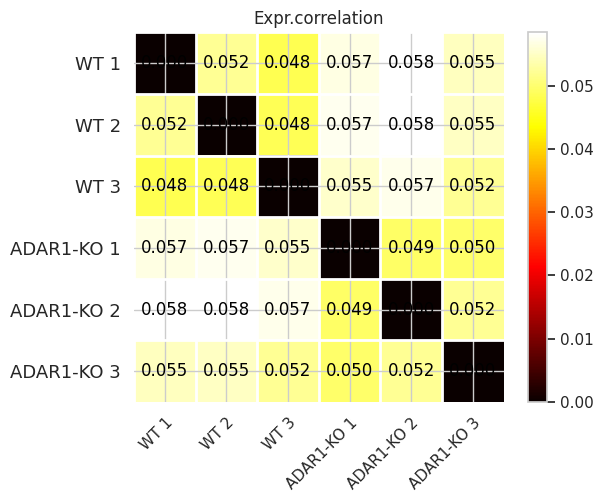

In [ ]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# Calculate the spearman correlation
corr = df[numcols].corr(method='spearman')
corr = 1 - corr


fig, ax = plt.subplots() # same as figure + .gca()

# cmap - mapping between values and colors
cmap = cmap=plt.get_cmap('hot')
# imshow = image show (yes, we treat the matrix as a picture)
im = ax.imshow(corr, cmap=cmap)

loc, labels = np.arange(len(numcols)), list(numcols)

# Create ticks
ax.set_xticks(loc)
ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")

ax.set_yticks(loc)
ax.set_yticklabels(labels, fontsize=13)

# label cells
for x in loc:
  for y in loc:
    value = corr.iloc[x, y]
    ax.text(y, x, f"{value:.3f}", ha="center", va="center", color="black")

# Disable spines
for s in ax.spines.values():
  s.set_visible(False)

# Add minor ticks
ax.set_xticks(loc - 0.5, minor=True)
ax.set_yticks(loc - 0.5, minor=True)

# And create a grid based on them
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
ax.tick_params(which="minor", bottom=False, left=False)

ax.set_title('Expr.correlation')

# Colorbar to visualize the cmap
fig.colorbar(im, ax=ax)

fig.show()

[0.25] Can you provide at least two reason why the third KO sample is an outlier in terms of the correlation with WT cells?

У него корелляция с образцом WT1 немного больше чем у КО образцов 1 и 2   
У него корелляция с образцом WT2 немного больше чем у КО образцов 1 и 2   
У него корелляция с образцом WT3 немного больше чем у КО образцов 1 и 2   
Разница в корреляции незначительна  
Возможно это связано с частичным нокаутом (в одной из гомологичных хромосом (ADAR1+/ADAR1-)). Также мы не знаем как проводили нокаут, может быть не вся анализируемая популяция клеток является нокаутированной по этому гену

[0.25] Play around with the style of the plot and provide your best version below.

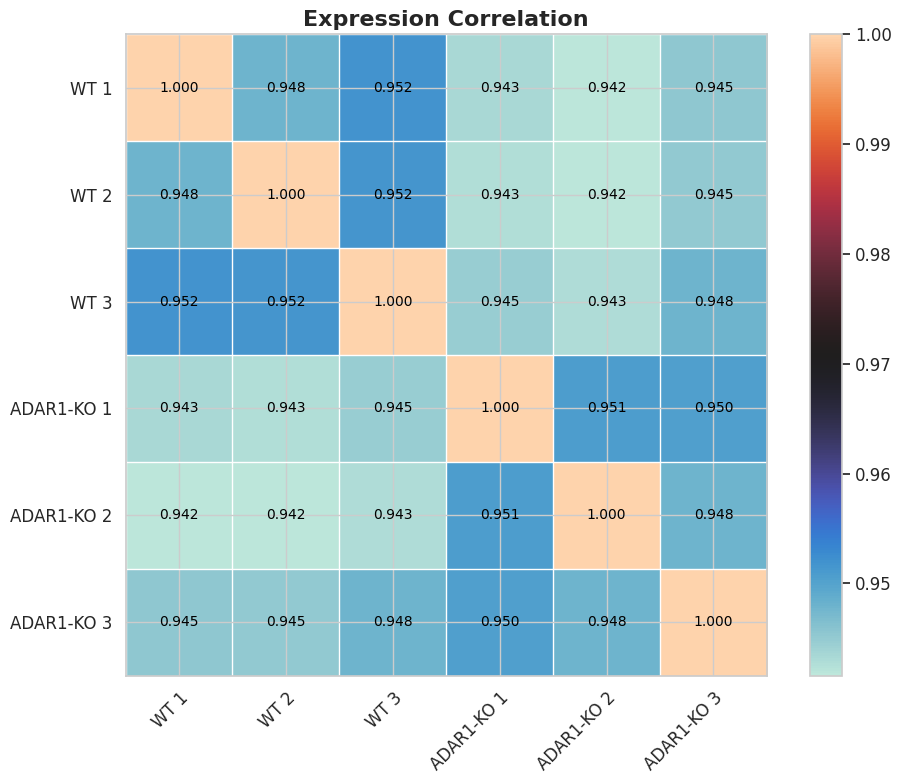

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Calculate the spearman correlation
corr = df[numcols].corr(method='spearman')

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size

# cmap - mapping between values and colors
cmap = plt.get_cmap('icefire')
# imshow = image show (yes, we treat the matrix as a picture)
im = ax.imshow(corr, cmap=cmap)

loc, labels = np.arange(len(numcols)), list(numcols)

# Create ticks
ax.set_xticks(loc)
ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor", fontsize=12)

ax.set_yticks(loc)
ax.set_yticklabels(labels, fontsize=12)

# label cells
for x in loc:
    for y in loc:
        value = corr.iloc[x, y]
        ax.text(y, x, f"{value:.3f}", ha="center", va="center", color="black", fontsize=10)

# Add minor ticks
ax.set_xticks(loc - 0.5, minor=True)
ax.set_yticks(loc - 0.5, minor=True)

ax.grid(which='minor', color='white', linestyle='-', linewidth=1)

ax.set_title('Expression Correlation', fontsize=16, fontweight='bold')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()

plt.show()

## Expression distribution [1.5]

Let's have a look at binned distribution of genes expression:

**[0.25] points in this section is for writing code.**

[None]

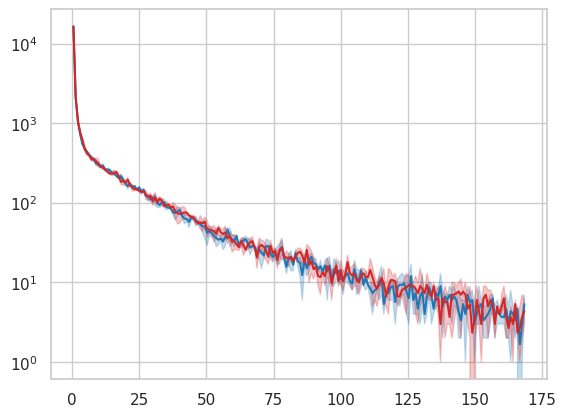

In [ ]:
fig, ax = plt.subplots()

# Let's ignore the highly expressed genes -
# it makes no sense to bin them, since there are only a few of them.
upthr = df[numcols].quantile(0.98).max()

# Create 200 bins ranging from 0 to upthr
# hint: use numpy
bins = np.linspace(0, upthr, 201)


# Calculate center of each bin
# hint: slice with step & sum & divide by 2
X = (bins[:-1]+bins[1:])/2

# Plot each genotype
for genotype in "WT", "ADAR1-KO":

  # There are 3 samples of each genotype
  counts = []
  for col in numcols:
    if genotype not in col:
      continue
    # count number of genes in each bin
    c, _ = np.histogram(df[col], bins)
    counts.append(c)

  # Turn list of 1D arrays into dense 2D array
  counts = np.asarray(counts)
  # Calculate stats for each bin
  meanv, minv, maxv = counts.mean(axis=0), counts.min(axis=0), counts.max(axis=0)

  # Get the color from the palette
  color = palette[genotype]

  # Plot the mean trend
  ax.plot(X, meanv, label=genotype, color=color)
  # Shade between min and max
  ax.fill_between(X, minv, maxv, color=color, alpha=0.25)


ax.set(yscale='log')

[0.5] What observations can we make based on this graph? *Hint: right tail.*

Суммарно для генов наблюдается большой разброс в экспрессии. Генов с высокой экспрессией меньше чем генов с низкой экспрессией (правый хвост пологий). Для генов с низкой экспрессией наблюдается больший разброс в экспрессии (min/max shade) до порядка, причем для КО образцов визуально этот разброс выше (для бинов ~ 135-155). В низко экспрессированных генах можно пытаться искать дифференциальную экспрессию.

[0.75] Now your task is to use all your skills and embellish this plot just like we did with the PCA figure. For example, be sure to include the legend, title, grid, and axis labels.

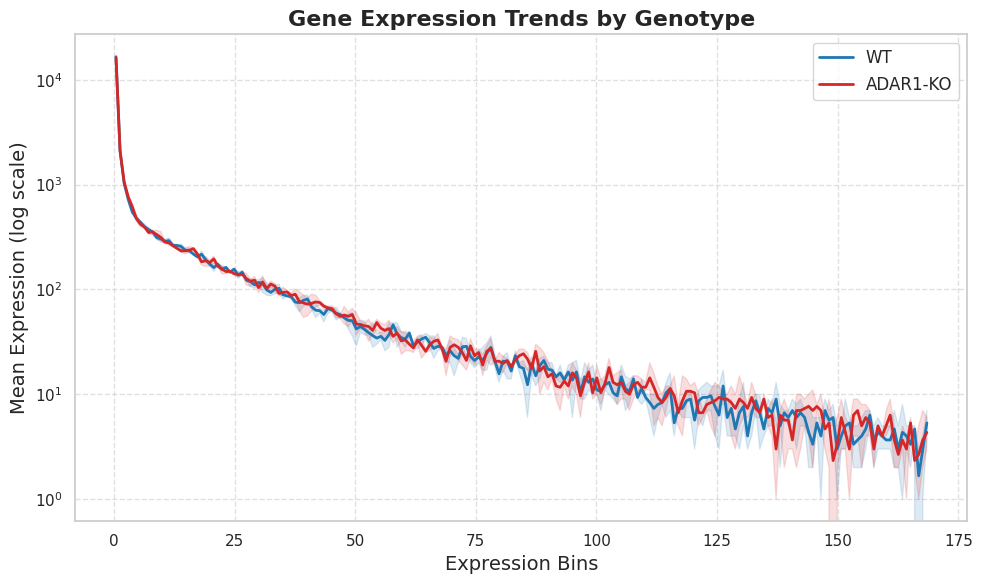

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for genotype in "WT", "ADAR1-KO":

  counts = []
  for col in numcols:
    if genotype not in col:
      continue
        # count the number of genes in each bin
    c, _ = np.histogram(df[col], bins)
    counts.append(c)

  counts = np.asarray(counts)
  meanv, minv, maxv = counts.mean(axis=0), counts.min(axis=0), counts.max(axis=0)

    # Get the color from the palette
  color = palette[genotype]

    # Plot the mean trend
  ax.plot(X, meanv, label=genotype, color=color, linewidth=2)
    # Shade between min and max
  ax.fill_between(X, minv, maxv, color=color, alpha=0.15)

ax.set(yscale='log')

ax.legend(loc='upper right', fontsize=12)

ax.set_title('Gene Expression Trends by Genotype', fontsize=16, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.6)

ax.set_xlabel('Expression Bins', fontsize=14)
ax.set_ylabel('Mean Expression (log scale)', fontsize=14)

plt.tight_layout()

plt.show()

## Expression heatmap [1]

Now let's visualize the expression of top N genes. First - let's get the data:

In [ ]:
# As before, we will select genes based on their overall expression
sumexpr = df.sum(1, numeric_only = True)

topn = 250
# select indices of topn genes with max expression
ind = sumexpr.nlargest(topn).index

# get the expression values
expr = df[numcols].loc[ind]
expr

,WT 1,WT 2,WT 3,ADAR1-KO 1,ADAR1-KO 2,ADAR1-KO 3
52530,167432.945541,193591.189912,81594.393731,161363.851954,127290.164003,159930.560284
54582,102334.349529,106563.019037,105427.248728,102413.253603,97606.676391,108510.891018
52514,24940.017679,25474.594691,113278.214067,11773.807530,33228.528517,20900.377150
37132,14274.473853,14348.844034,15964.720522,15954.974569,17029.868971,16250.250283
17914,11752.649712,11573.023455,12443.641672,13559.402518,14370.470688,13691.010991
...,...,...,...,...,...,...
3026,375.038797,349.275206,349.147615,366.439702,349.525445,324.287622
15722,330.728785,300.830754,366.588915,322.513975,403.102266,388.014514
8889,370.760177,371.130393,341.416847,348.605561,352.361944,322.746592
18815,399.123179,370.559682,370.802462,285.393773,358.448513,299.900925


This time, we will focus on the `seaborn` library - a framework built on top of the `matplotlib`. In fact `seaborn` is a nice collection of figure templates, that are fairly customizable.

[0.75] Look through the [seaborn](https://seaborn.pydata.org/) documenation and find a function that will give produce the figure below:

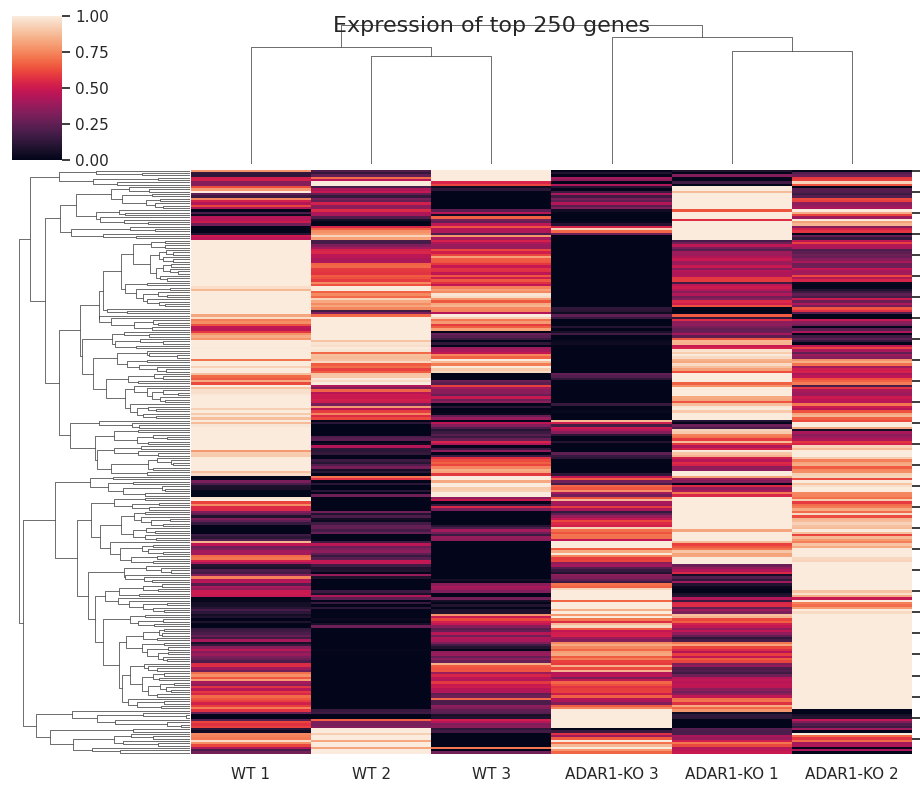

In [ ]:
import seaborn as sns

# Plot the data
cluster = sns.clustermap(expr, cmap='rocket', standard_scale = 0, figsize=(10, 8))

# Disable x-axis labels
cluster.ax_heatmap.set_yticklabels([])

# Add a figure title
cluster.figure.suptitle('Expression of top 250 genes', fontsize=16)

plt.show()

This is a nice example of variability that can be observed in real world biological data. However, in most cases such difference is not significant and just a random noise. Otherwise... It's useless.

[0.25] For what popular RNA-seq analysis would such a figure be good supporting evidence? Insert an example image (using the link).

Для анализа структуры хроматина тепловые карты будут очень информативными
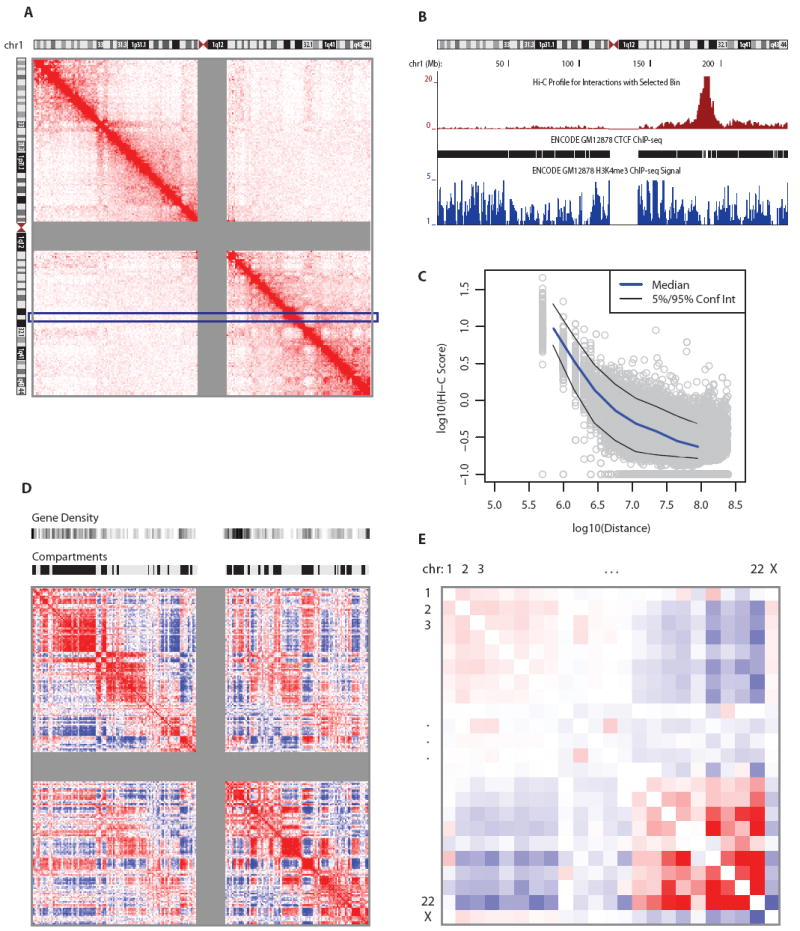
https://pubmed.ncbi.nlm.nih.gov/22652625/  


Кластерные тепловые карты наверное будут потезны в филогенетике и метагеномиге  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7382379/   
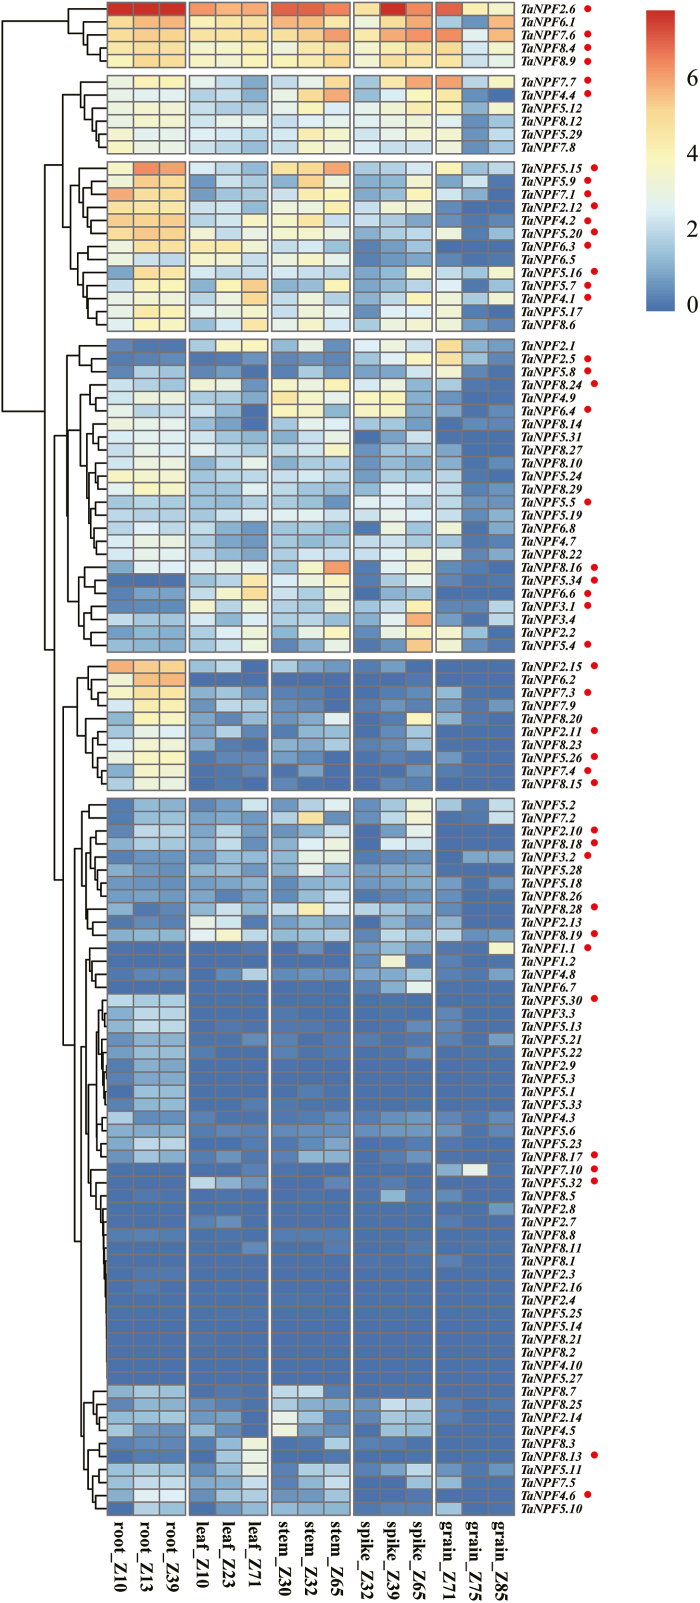


# Extra points [2]

RNA-seq analysis is a trending topic in the literature. To get extra point you need to:
1. Find a publication that used RNA sequencing to study the cellular transcriptome.
2. [0.5] Briefly describe the purpose of the study and the experiment in particular
3. [1.5] Select the figure of your choice in this study and reproduce it as accurately as possible

Hint: look for publications that present so-called source (raw) data, i.e. the data on which the figures are based.

